<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/TransferLearningResNet50_sourceLight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@author: LorenzoVisentini
"""

modelName = "ResNet50"

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#keras
import keras
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
#inception v3
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

random.seed(42)

In [ ]:
# link with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Images parameters
img_target_size = (224, 224)
shape = (224, 224, 3)

# Jupyter notebook paths
# train_dir = './source_light/training'
# validation_dir = './source_light/validation' 

# Google Colab paths
train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/train'
val_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/val' 
test_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/test' 


In [ ]:
n_classes = 3

# Hyperparameters
batch_size = 32
epochs = 10
drop_rate = 0.5
lr = 0.002

In [ ]:
# from https://www.kaggle.com/suniliitb96/tutorial-keras-transfer-learning-with-resnet50
# https://www.pyimagesearch.com/2020/04/27/fine-tuning-resnet-with-keras-tensorflow-and-deep-learning/

# Transfer learning on ResNet50 model
# use all the layers except for the last fully connected layer (because its 
# specific to the ImageNet competition)
# we will retrain layers with new inputs
pre_trained_model = ResNet50(input_shape = shape,
                               include_top = False, #exclude last flatten layer
                               weights = 'imagenet' #weights from imageNet
                               ) 

pre_trained_model.summary() #check ResNet50 structure

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
#transfer learning phase
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation= 'relu')(x)
x = Dropout(drop_rate)(x)
# x = Dense(128, activation= 'relu')(x)
x = Dense(n_classes, activation= 'softmax')(x)
model = Model(inputs = pre_trained_model.input, outputs = x)

#freeze the model excepted added layers
#freeze the model excepted added layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# custom optimizer
opt = optimizers.Adam(learning_rate=lr)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',  #because we have 3 possible outputs
              metrics = ['accuracy'])

In [ ]:
#preprocessing
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(directory=train_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle = False
                                                    )

val_generator = datagen.flow_from_directory(directory=val_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle = False
                                                    )

test_generator = datagen.flow_from_directory(directory = test_dir,
                                                    target_size = img_target_size,
                                                    color_mode="rgb",
                                                    batch_size = BATCH_SIZE_TESTING,
                                                    class_mode = "categorical",
                                                    shuffle = False
                                                )

Found 7000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = train_generator.n//batch_size,
                             epochs = epochs,
                             validation_data = val_generator,
                             validation_steps = val_generator.n//batch_size
                             )

Epoch 1/10
218/218 [==============================] - 108s 496ms/step - loss: 0.9148 - accuracy: 0.5550 - val_loss: 0.9179 - val_accuracy: 0.5494
Epoch 2/10
218/218 [==============================] - 102s 469ms/step - loss: 0.8137 - accuracy: 0.6028 - val_loss: 0.6094 - val_accuracy: 0.5930
Epoch 3/10
218/218 [==============================] - 102s 469ms/step - loss: 0.7960 - accuracy: 0.6150 - val_loss: 0.8767 - val_accuracy: 0.5654
Epoch 4/10
218/218 [==============================] - 103s 470ms/step - loss: 0.7721 - accuracy: 0.6221 - val_loss: 0.9614 - val_accuracy: 0.6085
Epoch 5/10
218/218 [==============================] - 102s 470ms/step - loss: 0.7629 - accuracy: 0.6274 - val_loss: 1.1290 - val_accuracy: 0.5819
Epoch 6/10
218/218 [==============================] - 102s 469ms/step - loss: 0.7579 - accuracy: 0.6244 - val_loss: 0.6914 - val_accuracy: 0.5714
Epoch 7/10
218/218 [==============================] - 102s 470ms/step - loss: 0.7435 - accuracy: 0.6326 - val_loss: 0.5981 -

In [ ]:
# save model and history
# consider highlight the different values of hyperparameters used ()
file_model = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/'+ modelName + 'SL' + '_Bs' + str(batch_size) + '_Ep' + str(epochs) + '_Dr' + str(drop_rate) + '_Lr' + str(lr)
model.save(file_model + '.h5')
print(file_model)
#save history
file_hist = file_model + '.csv'
df_history = pd.DataFrame(history.history)
with open(file_hist, 'w') as file:
    df_history.to_csv(file)

/content/drive/My Drive/Deep Learning Project - Image Classification/Models/SourceLightDropoutResNet50_32_10


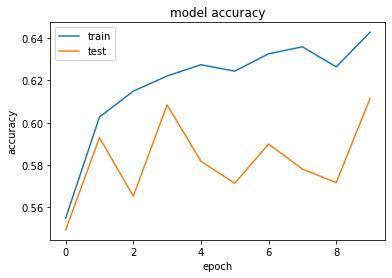

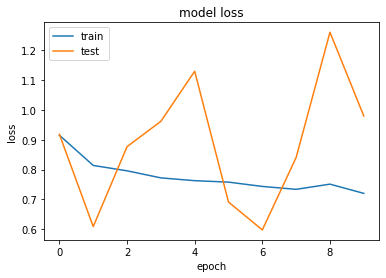

In [ ]:
#plot results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#evaluation
# https://stackoverflow.com/questions/40564936/keras-what-is-the-difference-between-model-evaluate-generator-and-model-predict
steps = test_generator.n // test_generator.batch_size

accuracy_ontest = model.evaluate_generator(test_generator, steps)
# predictions_ontest = model.predict_generator(test_generator, steps)
print(accuracy_ontest)
print(predictions_ontest)

[0.9919607639312744, 0.6071908473968506]
[[0.79349    0.09525254 0.1112574 ]
 [0.4860824  0.23990974 0.27400783]
 [0.6153992  0.17599432 0.20860648]
 ...
 [0.91050184 0.04023413 0.04926402]
 [0.5404455  0.23846425 0.22109024]
 [0.90568614 0.04524339 0.04907048]]
